# Final exam

You are not allowed to comminicate via any means with anybody during the exam. Your solutions go into a separate directory on your repository.

## Problem 1

**Part 1:**

1. Generate a normal (Gaussian) distribition of a sample size of 10000 with a mean of 2.5 and a standard deviation of 0.5.
2. Make a histogram plot of the distribution with 7 bins.

[ 2.39764617  2.73947167  2.24028064 ...,  2.49664722  1.89263845
                            2.82749433]                          


(array([ 0.00894058,  0.10126571,  0.49100182,  0.75265051,  0.40013638,
         0.06787539,  0.00273691]),
 array([ 0.62732206,  1.1753852 ,  1.72344834,  2.27151147,  2.81957461,
         3.36763775,  3.91570088,  4.46376402]),
 <a list of 7 Patch objects>)

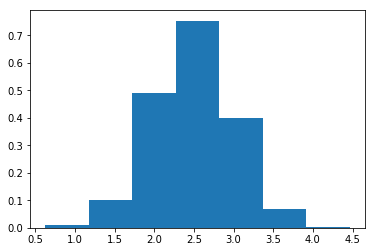

In [121]:
#(1)
import numpy as np
import sympy as sp
from numpy.linalg import cholesky
import matplotlib.pyplot as plt
samplesize = 10000
mu = 2.5
sigma = 0.5
np.random.seed(12345)
s = np.random.normal(mu, sigma, samplesize )
sp.pprint(s)
bins=7
plt.hist(s,bins,normed=True)



**Part 2:**
1. Make a plot of the function $$f(x) = 10 sin(x) + 0.1 x^2 + 1$$ in the range $[-2.,20]$. Use 200 data points for the plot.
2. Create noisy data out of the function $f(x)$ by replacing each value $f(x)$ by a random number drawn from a normal (Gaussian) distribution with mean $f(x)$ and standard deviation $3$. **Or:** Read this data from the file `data.txt`. Make a plot of that data set. 
3. Print out and add to the plot a red dot at the coordinates that correspond to the averages of the x and y coordinates of all points that are located in a box defined by $18 < y < 50$  and $7 x < 14$. 

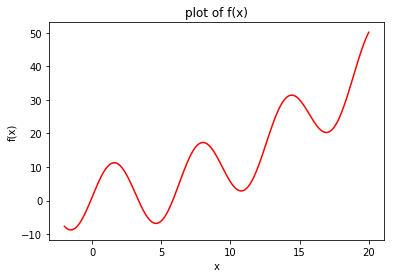

In [122]:
#(1)
x=np.linspace(-2.0,20,200)
y=[10*sp.sin(xi)+0.1*xi**2+1 for xi in x]
plt.plot(x,y,'r-')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("plot of f(x)")



In [123]:
#(2)
samplesize = 10000
for xi in x:
    mu = 10*sp.sin(xi)+0.1*xi**2+1
sigma = 3
np.random.seed(12345)
s = np.random.normal(mu, sigma, samplesize )
bins=7
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')


AttributeError: 'Float' object has no attribute 'exp'

**Part 3:**
1. Create an image plot of the 3D function $$ z(x,y) = \sin(x^2)\cos(x^3)$$ in the $x$ interval $[0,3.]$ and $y$ interval $[0,5.5]$ and use 500 data points for the plot in each direction. 
2. Make a line plot of $ z(x,y)$ along the diagonal from the lower left to the top right of the plot, i.e. along the line that connects the points $(0,0)$ and $(3.,5.5)$.

## Problem 2
 The [Lotka–Volterra equations](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations), also known as the predator–prey equations, represent a model for an interacting predator and a prey population:
 
 $$ \frac{dx}{dt} = \alpha x - \beta x y$$ 
 
 $$\frac{dy}{dt} = \delta xy -\gamma y$$ 
 
 where:
 * $x$ number of prey
 * $y$ number of predetors
 * and $\alpha$, $\beta$, $\delta$ and $\gamma$ are parameters that describe the interaction between the two species.
 
1. Write a program to implement a solution to the  Lotka–Volterra equations equations.
2. Create a plot with the evolution of prey and predetor populations vs time, for the parameters $\alpha=2/3$, $\beta=4/3$, $\delta=1$ and $\gamma=1/2$ for the time interval $[0,35]$

In [136]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt


def lveq(a,b,q,r):
    t=sp.Symbol('t',real=True)
    x=sp.Function('x')
    ODE1=sp.diff(x(t),t)-(a*x-b*x*y)
    sol1=sp.dsolve(ODE1)
    y=sp.Function('y')
    ODE2=sp.diff(y(t),t)-(q*x*y-r*y)
    sol2=sp.dsolve(ODE2)
    return(sol1,sol2)
sol=lveq(2/3,4/3,1,1/2)
print(sol)

TypeError: unsupported operand type(s) for *: 'float' and 'UndefinedFunction'

## Problem 3 

**Part 1:** Use the sympy libraries to compute the first and second derivatives of $$f(x) = \sin(\cos(x))$$ and print them to the screen, using Sympy's `pprint` command. 
 

In [130]:
import sympy as sp
import numpy as np
x=sp.Symbol('x',real=True)
f=sp.sin(sp.cos(x))
d1=sp.diff(f,x,1)
sp.pprint(sp.Eq(sp.Derivative(f,x),d1))
d2=sp.diff(f,x,2)
sp.pprint(sp.Eq(sp.Derivative(f,x,2),d2))

d                                    
──(sin(cos(x))) = -sin(x)⋅cos(cos(x))
dx                                   
  2                                                           
 d                  ⎛   2                                    ⎞
───(sin(cos(x))) = -⎝sin (x)⋅sin(cos(x)) + cos(x)⋅cos(cos(x))⎠
  2                                                           
dx                                                            


**Part 2:** Find all the solutions $0 \leq x \leq 2\pi$ to the equation $$f'(x) = f(x)$$ with $f$ from part (1).

In [135]:
import math as ma

list=[]
df=sp.diff(f(x),x)
while (0 <= x <= 2*ma.pi):
    if (f==df):
        list.append(x)
print(list)
        

TypeError: 'Mul' object is not callable

**Part 3:** Compute the integral $$ \int_0^1 \cos(x) x^x dx $$
 

In [131]:
x = sp.Symbol('x')
f=sp.cos(x)*(x**x)
sp.pprint(sp.integrate(f,(x, 0, 1)))


1             
⌠             
⎮  x          
⎮ x ⋅cos(x) dx
⌡             
0             


**Part 4**: Consider the matrix-valued function $$M(\theta) = \pmatrix{ \cos \theta & -\sin \theta \cr \sin \theta & \cos \theta }$$
and use Sympy to verify the matrix equation
$$M(\theta + \phi) = M(\theta) \cdot M(\phi)$$

In [ ]:
a=matrix([cos(x),-sin(x)],
[sin(x),cos(x)])